In [1]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.cuda import device
import pandas as pd
import torchaudio
import os
import re
import numpy as np
import librosa.display
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa

In [2]:
class CNNNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=128,
               out_channels=256,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
    
        self.dropout = nn.Dropout()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(8192, 7)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.dropout(x)
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

In [16]:
cnn = CNNNetwork().to(device)
cnn.load_state_dict(torch.load('cnnmelhorprovaamns.pth'))
cnn.eval()

CNNNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [6]:
import torch
from torch import nn


class Encoder(nn.Module):
    def __init__(self, encoded_space_dim):
        super().__init__()

        # Convolutional layers, 3 layers
        self.encoder_cnn = nn.Sequential(
            nn.Conv1d(1, 64, 1000, stride=64, padding=0),
            nn.ReLU(True),
            # nn.Conv1d(8, 16, 100, stride=4, padding=0),
            # nn.BatchNorm1d(16),
            # nn.ReLU(True),
            # nn.Conv1d(16, 32, 50, stride=4, padding=0),
            # nn.ReLU(True),
            # nn.Conv1d(32, 64, 50, stride=2, padding=0),
            # nn.ReLU(True)
        )

        # Flatten layer
        # self.flatten = nn.Flatten(start_dim=1)

        # Linear section
        # self.encoder_lin = nn.Sequential(
        #     nn.Linear(496, encoded_space_dim),
        #     nn.ReLU(True),
        # )

    def forward(self, x):
        x = self.encoder_cnn(x)
        # print(x.shape)
        # x = self.flatten(x)
        # print(x.shape)
        # x = self.encoder_lin(x)
        # print(x.shape)
        return x


class Decoder(nn.Module):

    def __init__(self, encoded_space_dim):
        super().__init__()
        # self.decoder_lin = nn.Sequential(
        #     nn.Linear(encoded_space_dim, 496),
        #     nn.ReLU(True)
        # )
        #
        # self.unflatten = nn.Unflatten(dim=1,
        #                               unflattened_size=(8, 62))

        self.decoder_conv = nn.Sequential(
            # nn.ConvTranspose1d(64, 32, 50,
            #                    stride=2, padding=0, output_padding=0),
            # nn.BatchNorm1d(32),
            # nn.ReLU(True),
            # nn.ConvTranspose1d(32, 16, 50, stride=4,
            #                    padding=0, output_padding=0),
            # nn.BatchNorm1d(16),
            # nn.ReLU(True),
            # nn.ConvTranspose1d(16, 8, 100, stride=4,
            #                    padding=0, output_padding=0),
            # nn.BatchNorm1d(8),
            # nn.ReLU(True),
            nn.ConvTranspose1d(64, 1, 1024, stride=64,
                               padding=0, output_padding=0),
        )

    def forward(self, x):
        # x = self.decoder_lin(x)
        # x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.tanh(x)
        return x


if __name__ == '__main__':
    from time import time
    # em gpu
    x = torch.randn(1, 1, 4*16000).cuda()
    print("Entrada: ", x.shape)
    encoder = Encoder(64).cuda()
    decoder = Decoder(64).cuda()
    x_ = encoder(x)
    x_ = decoder(x_)
    print("Saída:", x_.shape)

Entrada:  torch.Size([1, 1, 64000])
Saída: torch.Size([1, 1, 64000])


In [7]:
#Carregando os modelos
encoder.load_state_dict(torch.load('encoderRede_basicona_tanh2.pth'))
encoder.eval()

Encoder(
  (encoder_cnn): Sequential(
    (0): Conv1d(1, 64, kernel_size=(1000,), stride=(64,))
    (1): ReLU(inplace=True)
  )
)

In [8]:
decoder.load_state_dict(torch.load('decoderRede_basicona_tanh2.pth'))
decoder.eval()

Decoder(
  (decoder_conv): Sequential(
    (0): ConvTranspose1d(64, 1, kernel_size=(1024,), stride=(64,))
  )
)

In [9]:
from torch.utils.data import Dataset
import torchaudio
import torch
import pandas as pd


class DadosAE(Dataset):
    def __init__(self,
               target_sample_rate):
        self.raiz = r"C:\Users\heloi\OneDrive\Área de Trabalho\BIA 6 PERIODO\ANS"
        self.annotations = pd.read_csv(r"C:\Users\heloi\OneDrive\Área de Trabalho\BIA 6 PERIODO\ANS\metadata/testeravdess.csv")
        self.annotations_ruido = pd.read_csv(r"C:\Users\heloi\OneDrive\Área de Trabalho\BIA 6 PERIODO\ANS\metadata/testeravdessruidoso.csv")
        self.device = "cuda"
        self.target_sample_rate = target_sample_rate
        self.num_samples = 4 * 16000
        self.cache = dict()  # controlamos para ter no máximo 100 amostras no cache

    def __len__(self):
        return len(self.annotations_ruido)

    def __getitem__(self, index):
        if index in self.cache:
            return self.cache[index]
        path_ruido, path_limpo = self._get_audio_sample_path(index)

        # audio com ruido (X)
        signal, sr = torchaudio.load(self.raiz + "/" + path_ruido)
        signal = signal.to(self.device)
        signal = self._resample_if_necessary(signal, sr)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)

        # audio limpo (y)
        signal_limpo, sr_limpo = torchaudio.load(self.raiz + "/" + path_limpo)
        signal_limpo = signal_limpo.to(self.device)
        signal_limpo = self._resample_if_necessary(signal_limpo, sr_limpo)
        signal_limpo = self._mix_down_if_necessary(signal_limpo)
        signal_limpo = self._cut_if_necessary(signal_limpo)
        signal_limpo = self._right_pad_if_necessary(signal_limpo)

        if len(self.cache) < 256:
            self.cache[index] = (signal, signal_limpo)
        else:
            self.cache = dict()
            self.cache[index] = (signal, signal_limpo)

        return signal, signal_limpo

    def _cut_if_necessary(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _right_pad_if_necessary(self, signal):
        length_signal = signal.shape[1]
        if length_signal < self.num_samples:
            num_missing_samples = self.num_samples - length_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _resample_if_necessary(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate)
            resampler.to(self.device)
            signal = resampler(signal)
        return signal

    def _mix_down_if_necessary(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self, index):
        return self.annotations_ruido.iloc[index, 0], self.annotations.iloc[index, 0]

    def _get_audio_sample_label(self, index):
        return self.annotations.iloc[index, 1]

In [10]:
#Classe para criação do dataloader, com ela conseguimos abrir os arquivos de áudio a serem utilizados
from torch.utils.data import Dataset
class SerDataset (Dataset):

    def __init__(self,
                 annotations_file,
                 transformation,
                 target_sample_rate,
                 num_samples,device):
        self.annotations = pd.read_csv(annotations_file)
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples
        self.cache = dict()
        

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self,index):
        if index in self.cache:
          return self.cache[index]
        audio_sample_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        signal, sr = torchaudio.load(audio_sample_path)
        signal = signal.to(self.device)
        signal = self._resample_if_necessary(signal, sr)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)
        signal = self.transformation(signal)
        label_dict = {"fear":0, "disgust":1, "happy":2, "sad":3, "neutral":4, "angry":5, "surprise":6}
        label2 = label_dict[label]
        self.cache[index] = signal, label2
        return signal, label2

    def _cut_if_necessary(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _right_pad_if_necessary(self, signal):
        length_signal = signal.shape[1]
        if length_signal < self.num_samples:
            num_missing_samples = self.num_samples - length_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _resample_if_necessary(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate)
            resampler.to(self.device)
            signal = resampler(signal)
        return signal

    def _mix_down_if_necessary(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self,index):
        return self.annotations.iloc[index,0]
    def _get_audio_sample_label(self,index):
        return self.annotations.iloc[index,1]


In [11]:
test_dataautoencoder = DadosAE(target_sample_rate=16000)
batch_size = 16
test_loaderautoencoder = DataLoader(test_dataautoencoder, batch_size=batch_size, shuffle=True)

In [12]:
#Acessando a gpu
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(f"using {device}")

using cuda


In [13]:
#Captando os dados de teste com ruído
ANNOTATIONS_FILE = "metadata/testeravdessruidoso.csv"
SAMPLE_RATE = 16000
NUM_SAMPLES = 4*16000

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)
test_data = SerDataset(ANNOTATIONS_FILE,mel_spectrogram,SAMPLE_RATE,NUM_SAMPLES,device)

print(f"There are {len(test_data)} samples in the dataset.")

There are 1144 samples in the dataset.


In [14]:
#criando o dataloader
test_loader= DataLoader(dataset = test_data, batch_size = batch_size, shuffle=True)

In [17]:
#sessão de teste com ruído

#lista para armazenar os y verdadeiros
y_truetest = []
#lista para armazenar os y preditos
y_predtest = []

cnn.eval()

with torch.no_grad():
  for inp_test, label_test in test_loader:
                
      #alocando o input e a label na GPU
      inp_test = inp_test.to(device=device)
      label_test = label_test.to(device=device)
      
      #predição do modelo em cima do input
      preds3 = cnn(inp_test)
      preds3 = nn.functional.softmax(preds3, dim=1)

      #preenchendo as listas referente ao y verdadeiro e y predito
      for i in range(len(label_test)):
        y_truetest.append(int(label_test[i].item()))
        y_predtest.append(int(torch.argmax(preds3[i]).item()))

In [18]:
#lista para armazenar os y preditos
y_predtestautoencoder = []

cnn.eval()

with torch.no_grad():
  for input, target in test_loaderautoencoder:
    encoded_Data = encoder(input)
    decoded_Data = decoder(encoded_Data)
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    n_fft=1024,
    hop_length=512,
    n_mels=64
)
    mel_spectrogram.to(device)
    signal = mel_spectrogram(decoded_Data)
            
      
    #predição do modelo em cima do input
    predsautoencoder = cnn(signal)
    predsautoencoder = nn.functional.softmax(predsautoencoder, dim=1)

    #preenchendo as listas referente ao y verdadeiro e y predito
    for i in range(len(target)):
        y_predtestautoencoder.append(int(torch.argmax(predsautoencoder[i]).item()))

In [19]:
y_truetest = torch.tensor(y_truetest)
y_predtestautoencoder = torch.tensor(y_predtestautoencoder)

In [20]:
y_predtestautoencoder.shape

torch.Size([1144])

In [21]:
y_truetest.shape

torch.Size([1144])

In [22]:
from torchmetrics import ConfusionMatrix
from sklearn.metrics import ConfusionMatrixDisplay
##Vendo os resultados/métricas para o teste com ruído
#montando a matriz de confusão
confmat = ConfusionMatrix(num_classes=7)
confmat(y_predtestautoencoder, y_truetest)

tensor([[  0,   0, 124,  25,  21,   6,   0],
        [  0,   0, 123,  25,  19,   9,   0],
        [  1,   0, 128,  18,  19,  10,   0],
        [  0,   1, 121,  24,  21,   9,   0],
        [  0,   0,  57,  11,  13,   7,   0],
        [  0,   0, 123,  22,  25,   6,   0],
        [  0,   0, 126,  16,  29,   5,   0]])

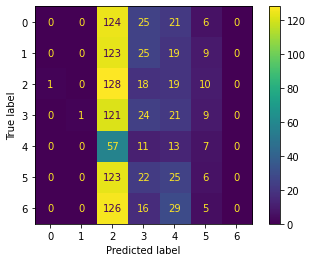

In [23]:
matrizconfusao = confmat(y_predtestautoencoder,y_truetest)
disp = ConfusionMatrixDisplay(confusion_matrix=np.array(matrizconfusao))
disp.plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report
#{"fear":0, "disgust":1, "happy":2, "sad":3, "neutral":4, "angry":5, "surprise":6}
target_names = ['Fear', 'Disgust', 'Happy','Sad','Neutral','Angry','Surprise']
report = classification_report(np.array(y_truetest),np.array(y_predtestautoencoder),target_names= target_names,zero_division=True)
print(report)

              precision    recall  f1-score   support

        Fear       0.00      0.00      0.00       176
     Disgust       0.00      0.00      0.00       176
       Happy       0.16      0.73      0.26       176
         Sad       0.17      0.14      0.15       176
     Neutral       0.09      0.15      0.11        88
       Angry       0.12      0.03      0.05       176
    Surprise       1.00      0.00      0.00       176

    accuracy                           0.15      1144
   macro avg       0.22      0.15      0.08      1144
weighted avg       0.23      0.15      0.08      1144

